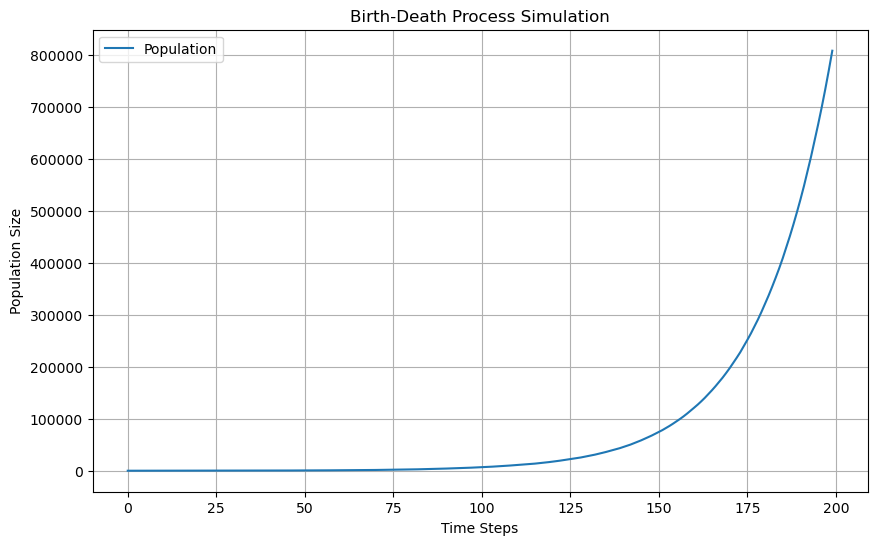

In [30]:
#p1
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the birth-death process
def birth_death_process(initial_population, birth_rate, death_rate, time_steps):
    population = np.zeros(time_steps)
    population[0] = initial_population

    for t in range(1, time_steps):
        current_population = population[t - 1]
        
        # Calculate number of births and deaths
        births = np.random.poisson(birth_rate * current_population)
        deaths = np.random.poisson(death_rate * current_population)

        # Update population for the next time step
        population[t] = max(current_population + births - deaths, 0)  # population can't be negative

    return population

# Parameters
initial_population = 50
birth_rate = 0.1  # Birth rate per individual per time step
death_rate = 0.05  # Death rate per individual per time step
time_steps = 200

# Simulate the process
population = birth_death_process(initial_population, birth_rate, death_rate, time_steps)

# Plot the population over time
plt.figure(figsize=(10, 6))
plt.plot(population, label='Population')
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.title('Birth-Death Process Simulation')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#p2


import numpy as np

def stationary_distribution(birth_rate, death_rate, max_population):
    # Initialize the stationary distribution array
    pi = np.zeros(max_population + 1)
    pi[0] = 1.0  # Arbitrary choice to start from state 0
    
    # Compute the stationary distribution using the detailed balance equation
    for i in range(1, max_population + 1):
        pi[i] = pi[i - 1] * (birth_rate / death_rate)
    
    # Normalize the distribution so that it sums to 1
    pi /= np.sum(pi)
    
    return pi

# Parameters
birth_rate = 0.1  # λ
death_rate = 0.05  # μ
max_population = 10  # Maximum number of states to consider

# Compute stationary distribution
stationary_dist = stationary_distribution(birth_rate, death_rate, max_population)

# Print the stationary distribution
print(" ")
print(" ")
for i in range(len(stationary_dist)):
    
    print(f"State {i}: {stationary_dist[i]:.4f}")
print(" ")
print(" ")


 
 
State 0: 0.0005
State 1: 0.0010
State 2: 0.0020
State 3: 0.0039
State 4: 0.0078
State 5: 0.0156
State 6: 0.0313
State 7: 0.0625
State 8: 0.1251
State 9: 0.2501
State 10: 0.5002
 
 


In [3]:
#p3 
import numpy as np

def expected_time_to_absorption(birth_rates, death_rates):
    n = len(birth_rates)  # Number of transient states
    A = np.zeros((n, n))  # Coefficient matrix for the system of equations
    b = np.ones(n)        # Right-hand side (all ones because E[absorption] = 1 when i = absorbing state)

    # Set up the system of equations for E(i)
    for i in range(n):
        if i == 0:
            # State 0: only death rate to absorb at state -1 (absorbing state)
            A[i][i] = death_rates[i]
            A[i][i+1] = -birth_rates[i]
        elif i == n - 1:
            # Last transient state: birth rate leads to absorbing state (at state n+1)
            A[i][i-1] = -death_rates[i]
            A[i][i] = birth_rates[i]
        else:
            # General case for states in between
            A[i][i-1] = -death_rates[i]
            A[i][i] = birth_rates[i] + death_rates[i]
            A[i][i+1] = -birth_rates[i]

    # Solve the system of equations to get the expected time for each state
    expected_times = np.linalg.solve(A, b)

    return expected_times

# Example usage:
birth_rates = [0.5, 0.4, 0.3]  # Example birth rates for each state
death_rates = [0.2, 0.3, 0.4]  # Example death rates for each state

expected_times = expected_time_to_absorption(birth_rates, death_rates)
print("Expected times to absorption for each state:", expected_times)


Expected times to absorption for each state: [-11.42857143  -6.57142857  -5.42857143]


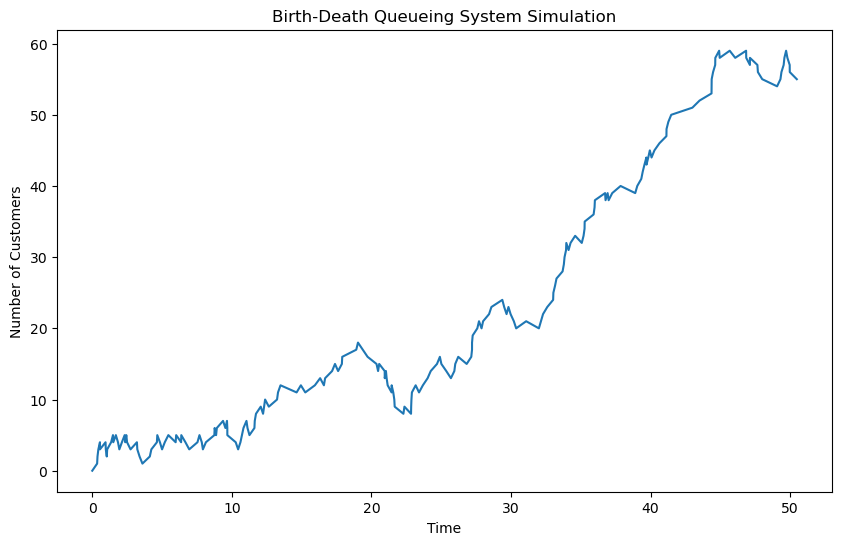

In [19]:
#p4
import numpy as np
import matplotlib.pyplot as plt

def simulate_birth_death_queueing_system(lambda_rate, mu_rate, max_time, initial_customers=0):
    """
    Simulates a birth-death queueing system.
    
    Parameters:
    lambda_rate (float): The birth rate (arrival rate of customers)
    mu_rate (float): The death rate (service rate of customers)
    max_time (int): The total time to simulate
    initial_customers (int): The initial number of customers in the system (default is 0)
    
    Returns:
    times (list): The list of time points where events (birth or death) occur
    customers (list): The number of customers in the system at each event time
    """
    # Initialize variables
    time = 0
    customers = initial_customersi
    times = [0]
    customer_counts = [customers]
    
    # Simulate events over time
    while time < max_time:
        if customers == 0:
            # If no customers, only a birth can happen
            time_to_next_birth = np.random.exponential(1 / lambda_rate)
            time += time_to_next_birth
            customers += 1
        else:
            # Calculate rates for birth and death
            birth_rate = lambda_rate
            death_rate = mu_rate
            total_rate = birth_rate + death_rate
            
            # Time to next event (birth or death)
            time_to_next_event = np.random.exponential(1 / total_rate)
            time += time_to_next_event
            
            # Decide if it's a birth or death
            if np.random.rand() < birth_rate / total_rate:
                # Birth event
                customers += 1
            else:
                # Death event
                customers -= 1
        
        # Record the time and the number of customers
        times.append(time)
        customer_counts.append(customers)
    
    return times, customer_counts
# Example usage
lambda_rate = 3  # Arrival rate of customers
mu_rate = 2      # Service rate of customers
max_time = 50    # Total simulation time

# Simulate the queueing system
times, customer_counts = simulate_birth_death_queueing_system(lambda_rate, mu_rate, max_time)

# Plot the results
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(times, customer_counts)
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Birth-Death Queueing System Simulation')
plt.show()


In [1]:
#p5
import numpy as np

def birth_death_probability(initial_state, target_state, t, birth_rate, death_rate):
    # Define the number of states
    max_state = max(initial_state, target_state) + t + 1  # A buffer to accommodate possible states
    
    # Initialize the transition matrix
    P = np.zeros((max_state + 1, max_state + 1))
    
    # Fill the transition matrix
    for i in range(max_state + 1):
        if i < max_state:
            P[i][i + 1] = birth_rate  # Probability of birth (moving to i + 1)
        if i > 0:
            P[i][i - 1] = death_rate  # Probability of death (moving to i - 1)
        P[i][i] = 1 - (birth_rate + death_rate)  # Staying in the same state
    
    # Normalize the rows (if necessary)
    for i in range(max_state + 1):
        P[i] /= np.sum(P[i])

    # Initialize the probability distribution
    probabilities = np.zeros(max_state + 1)
    probabilities[initial_state] = 1.0  # Start from the initial state

                                            
    for _ in range(t): 
        probabilities = np.dot(probabilities, P)
    
    return probabilities[target_state]

# Example usage
initial_state = 0  # Starting from state 0
target_state = 3   # Targeting state 3
t = 5              # After 5 time units
birth_rate = 0.6   # Birth rate
death_rate = 0.4   # Death rate

prob = birth_death_probability(initial_state, target_state, t, birth_rate, death_rate)
print(f"The probability of reaching state {target_state} after {t} time units: {prob:.4f}")


The probability of reaching state 3 after 5 time units: 0.4032


In [33]:
#p6
def birth_death_steady_state_mean_variance(birth_rate, death_rate):
        
    if birth_rate <= 0 or death_rate <= 0:
        raise ValueError("Both birth rate and death rate must be positive.")
    
    # Mean (expected population size) at steady state
    mean = birth_rate / death_rate
    
    # Variance of population size at steady state
    variance = birth_rate / (death_rate**2)
    
    return mean, variance

# Example usage:
birth_rate = 2.0  # λ
death_rate = 1.5  # μ
mean, variance = birth_death_steady_state_mean_variance(birth_rate, death_rate)
print(f"Mean population size: {mean}")
print(f"Variance of population size: {variance}")


Mean population size: 1.3333333333333333
Variance of population size: 0.8888888888888888


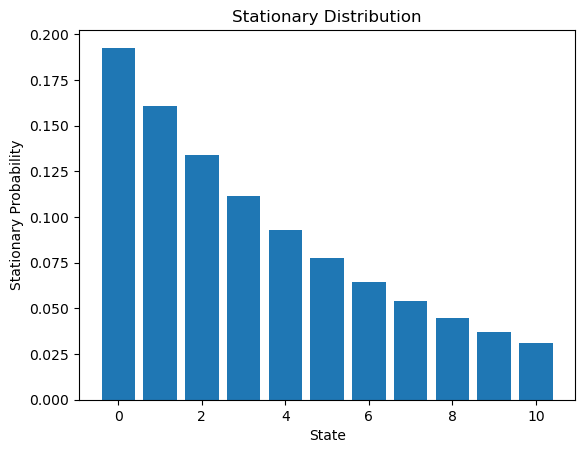

In [18]:
#p7
import numpy as np
import matplotlib.pyplot as plt

def stationary_distribution(birth_rates, death_rates):
    pi = np.zeros(len(birth_rates) + 1)
    pi[0] = 1
    for i in range(1, len(pi)):
        pi[i] = pi[i-1] * birth_rates[i-1] / death_rates[i-1]
    return pi / np.sum(pi)

def plot_stationary_distribution(pi):
    plt.bar(np.arange(len(pi)), pi)
    plt.xlabel('State')
    plt.ylabel('Stationary Probability')
    plt.title('Stationary Distribution')
    plt.show()

birth_rates = [0.5] * 10  # example with more states
death_rates = [0.6] * 10

pi = stationary_distribution(birth_rates, death_rates)
plot_stationary_distribution(pi)


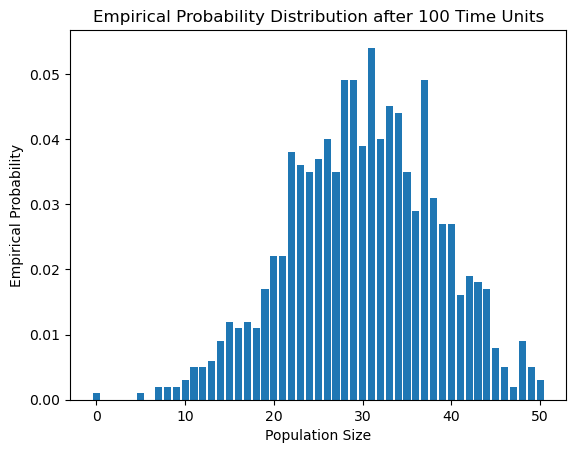

In [24]:
#p8
import numpy as np
import matplotlib.pyplot as plt

# Parameters
birth_rate = 0.5   # Birth rate (lambda)
death_rate = 0.3   # Death rate (mu)
initial_population = 10
time_horizon = 100  # Total simulation time
num_simulations = 1000  # Number of runs
max_population = 50     # Max population size to track for probability distribution

def birth_death_process(initial_population, birth_rate, death_rate, time_horizon):
    population = initial_population
    times = [0]
    populations = [population]
    
    while times[-1] < time_horizon:
        if population == 0:
            # Only birth can happen
            rate = birth_rate
        else:
            # Rate of transition = birth rate + death rate
            rate = birth_rate + death_rate
        
        # Time until the next event
        wait_time = np.random.exponential(1/rate)
        times.append(times[-1] + wait_time)
        
        # Randomly choose if it's a birth or a death
        if np.random.rand() < birth_rate / rate:
            population += 1  # Birth
        else:
            population = max(0, population - 1)  # Death
        
        populations.append(population)
        
    return populations, times

# Function to run simulations and compute empirical distribution
def simulate_and_get_distribution(num_simulations, initial_population, birth_rate, death_rate, time_horizon, max_population):
    final_populations = []
    
    for _ in range(num_simulations):
        populations, times = birth_death_process(initial_population, birth_rate, death_rate, time_horizon)
        final_populations.append(populations[-1])  # Record the final population size
    
    # Empirical distribution
    population_counts =  np.zeros(max_population + 1)
    
    for pop in final_populations:
        if pop <= max_population:
            population_counts[pop] += 1
    
    # Normalize to get probabilities
    probability_distribution = population_counts / num_simulations
    
    return probability_distribution

# Simulate and get the probability distribution
probability_distribution = simulate_and_get_distribution(num_simulations, initial_population, birth_rate, death_rate, time_horizon, max_population)

# Plot the empirical probability distribution
plt.bar(range(max_population + 1), probability_distribution)
plt.xlabel('Population Size')
plt.ylabel('Empirical Probability')
plt.title(f'Empirical Probability Distribution after {time_horizon} Time Units')
plt.show()

  

In [26]:
#p9
import math

def expected_population(N_0, birth_rate, death_rate, t):
    """
    Calculate the expected population at time t in a birth-death process.
    
    Parameters:
    N_0 (int): Initial population size
    birth_rate (float): Birth rate per individual (lambda)
    death_rate (float): Death rate per individual (mu)
    t (float): Time at which to calculate the population
    
    Returns:
    float: Expected population at time t
    """
    return N_0 * math.exp((birth_rate - death_rate) * t)

# Example usage:
N_0 = 100  # initial population
birth_rate = 0.05  # birth rate
death_rate = 0.02  # death rate
t = 10  # time

expected_pop = expected_population(N_0, birth_rate, death_rate, t)
print(f"Expected population at time {t}: {expected_pop}")


Expected population at time 10: 134.9858807576003


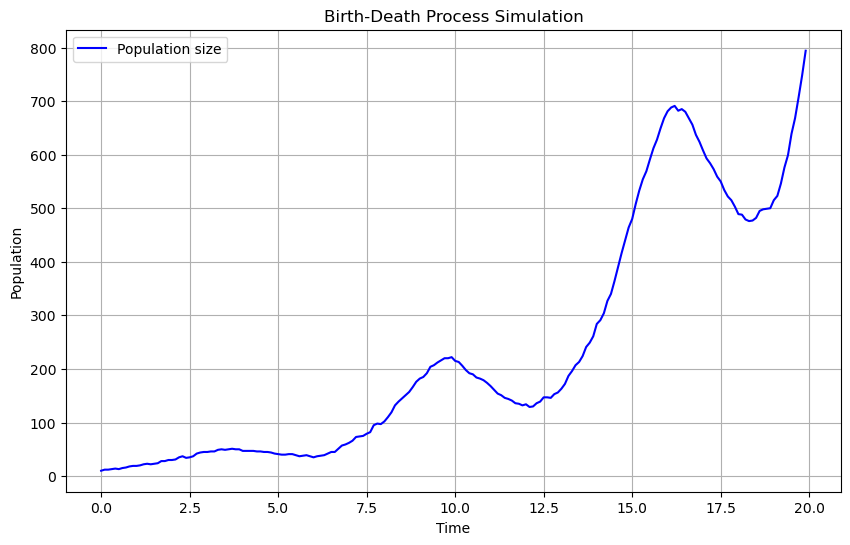

In [28]:
#p10
import numpy as np
import matplotlib.pyplot as plt

def birth_rate(t):
    """Time-dependent birth rate function."""
    return 0.5 * (1 + np.sin(t))  # Example: oscillates between 0 and 1 

def death_rate():
    """Constant death rate."""
    return 0.3

def simulate_birth_death_process(time_end, dt, initial_population):
    """Simulate a birth-death process."""
    time_points = np.arange(0, time_end, dt)
    population = [initial_population]
    
    for t in time_points[:-1]:
        current_population = population[-1]
        
        # Calculate birth and death rates
        b_rate = birth_rate(t)
        d_rate = death_rate()
        
        # Calculate expected births and deaths
        births = np.random.poisson(b_rate * current_population * dt)
        deaths = np.random.poisson(d_rate * current_population * dt)
        
        # Update population
        new_population = current_population + births - deaths
        population.append(max(new_population, 0))  # Prevent negative population
    
    return time_points, population

# Parameters
time_end = 20.0  # Total simulation time
dt = 0.1        # Time step
initial_population = 10  # Starting population

# Run simulation
time_points, population = simulate_birth_death_process(time_end, dt, initial_population)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_points, population, label='Population size', color='blue')
plt.title('Birth-Death Process Simulation')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()


In [3]:
#p11
import numpy as np

def viterbi(observations, states, start_prob, trans_prob, emit_prob):
    n_states, T = len(states), len(observations)
    dp, path = np.zeros((n_states, T)), np.zeros((n_states, T), dtype=int)

    # Initialization
    dp[:, 0] = [start_prob[s] * emit_prob[s][observations[0]] for s in states]

    # Recursion
    for t in range(1, T):
        for i, curr_state in enumerate(states):
            probs = dp[:, t-1] * [trans_prob[s][curr_state] for s in states]
            dp[i, t] = np.max(probs) * emit_prob[curr_state][observations[t]]
            path[i, t] = np.argmax(probs)

    # Backtracking
    best_last_state = np.argmax(dp[:, -1])
    best_path = [best_last_state]
    for t in range(T-1, 0, -1):
        best_last_state = path[best_last_state, t]
        best_path.insert(0, best_last_state)

    return [states[i] for i in best_path]

# Example usage
states = ['Healthy', 'Fever']
observations = ['normal', 'cold', 'dizzy']
start_prob = {'Healthy': 0.6, 'Fever': 0.4}
trans_prob = {'Healthy': {'Healthy': 0.7, 'Fever': 0.3}, 'Fever': {'Healthy': 0.4, 'Fever': 0.6}}
emit_prob = {'Healthy': {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1}, 'Fever': {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}}

result = viterbi(observations, states, start_prob, trans_prob, emit_prob)
print("Most likely sequence of hidden states:", result)


Most likely sequence of hidden states: ['Healthy', 'Healthy', 'Fever']


In [5]:
#p12
import numpy as np

class HMM:
    def __init__(self, transition_matrix, emission_matrix, initial_prob):
        self.trans_mat = np.array(transition_matrix)
        self.emit_mat = np.array(emission_matrix)
        self.init_prob = np.array(initial_prob)

    def generate_sequence(self, length):
        hidden_states = [np.random.choice(len(self.init_prob), p=self.init_prob)]
        observations = [np.random.choice(len(self.emit_mat[0]), p=self.emit_mat[hidden_states[-1]])]

        for _ in range(1, length):
            hidden_states.append(np.random.choice(len(self.trans_mat), p=self.trans_mat[hidden_states[-1]]))
            observations.append(np.random.choice(len(self.emit_mat[0]), p=self.emit_mat[hidden_states[-1]]))

        return hidden_states, observations

# Example usage
if __name__ == "__main__":
    transition_matrix = [[0.7, 0.3], [0.4, 0.6]]
    emission_matrix = [[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]]
    initial_prob = [0.6, 0.4]

    hmm = HMM(transition_matrix, emission_matrix, initial_prob)
    hidden_states, observations = hmm.generate_sequence(10)

    print("Hidden States:", hidden_states)
    print("Observations:", observations)


Hidden States: [1, 1, 1, 1, 1, 0, 0, 0, 1, 0]
Observations: [0, 0, 2, 0, 1, 1, 2, 1, 0, 2]


In [7]:
#p13
import numpy as np

def forward_algorithm(observations, states, start_prob, trans_prob, emiss_prob):
    """
    Parameters:
    observations: list of observed events
    states: list of states in the HMM
    start_prob: dict with the starting probabilities for each state
    trans_prob: dict of dicts with transition probabilities between states
    emiss_prob: dict of dicts with emission probabilities of observations from states
    
    Returns:
    Total probability of the observed sequence
    """
    
    # Number of states and observations
    num_states = len(states)
    num_obs = len(observations)
    
    # Initialize forward matrix (num_states x num_obs)
    forward = np.zeros((num_states, num_obs))
    
    # Initialization step: at time 0
    for i in range(num_states):
        state = states[i]
        forward[i, 0] = start_prob[state] * emiss_prob[state][observations[0]]
    
    # Recursion step: for each observation from 1 to T-1
    for t in range(1, num_obs):
        for i in range(num_states):
            state = states[i]
            forward[i, t] = sum(forward[j, t-1] * trans_prob[states[j]][state] for j in range(num_states)) * emiss_prob[state][observations[t]]
    
    # Termination step: sum over the last column to get the total probability
    total_prob = sum(forward[i, num_obs-1] for i in range(num_states))
    
    return total_prob

# Example usage
observations = ['walk', 'shop', 'clean']
states = ['Rainy', 'Sunny']
start_prob = {'Rainy': 0.6, 'Sunny': 0.4}
trans_prob = {
    'Rainy': {'Rainy': 0.7, 'Sunny': 0.3},
    'Sunny': {'Rainy': 0.4, 'Sunny': 0.6}
}
emiss_prob = {
    'Rainy': {'walk': 0.1, 'shop': 0.4, 'clean': 0.5},
    'Sunny': {'walk': 0.6, 'shop': 0.3, 'clean': 0.1}
}

probability = forward_algorithm(observations, states, start_prob, trans_prob, emiss_prob)
print(f"Probability of the observed sequence: {probability}")


Probability of the observed sequence: 0.033612


In [5]:
#p14
import numpy as np

class HMM:
    def __init__(self, n_states, n_observations):
        # Number of hidden states and observation states
        self.n_states = n_states
        self.n_observations = n_observations

        # Randomly initialize the model parameters
        self.transition_matrix = np.random.rand(n_states, n_states)
        self.transition_matrix /= self.transition_matrix.sum(axis=1)[:, None]

        self.emission_matrix = np.random.rand(n_states, n_observations)
        self.emission_matrix /= self.emission_matrix.sum(axis=1)[:, None]

        self.initial_prob = np.random.rand(n_states)
        self.initial_prob /= self.initial_prob.sum()

    def forward(self, observations):
        T = len(observations)
        alpha = np.zeros((T, self.n_states))

        # Initialization step
        alpha[0, :] = self.initial_prob * self.emission_matrix[:, observations[0]]

        # Forward step
        for t in range(1, T):
            for j in range(self.n_states):
                alpha[t, j] = np.sum(alpha[t - 1, :] * self.transition_matrix[:, j]) * self.emission_matrix[j, observations[t]]

        return alpha

    def backward(self, observations):
        T = len(observations)
        beta = np.zeros((T, self.n_states))

        # Initialization step
        beta[T - 1, :] = 1

        # Backward step
        for t in range(T - 2, -1, -1):
            for i in range(self.n_states):
                beta[t, i] = np.sum(self.transition_matrix[i, :] * self.emission_matrix[:, observations[t + 1]] * beta[t + 1, :])

        return beta

    def baum_welch(self, observations, n_iters=100):
        T = len(observations)

        for _ in range(n_iters):
            alpha = self.forward(observations)
            beta = self.backward(observations)

            # Compute xi and gamma
            xi = np.zeros((T - 1, self.n_states, self.n_states))
            gamma = np.zeros((T, self.n_states))

            for t in range(T - 1):
                denom = np.sum(alpha[t, :] @ self.transition_matrix * self.emission_matrix[:, observations[t + 1]] * beta[t + 1, :])
                for i in range(self.n_states):
                    numer = alpha[t, i] * self.transition_matrix[i, :] * self.emission_matrix[:, observations[t + 1]] * beta[t + 1, :]
                    xi[t, i, :] = numer / denom

            gamma = np.sum(xi, axis=2)
            gamma = np.vstack((gamma, alpha[-1, :] * beta[-1, :] / np.sum(alpha[-1, :] * beta[-1, :])))

            # Update model parameters
            self.initial_prob = gamma[0]

            self.transition_matrix = np.sum(xi, axis=0) / np.sum(gamma[:-1], axis=0)[:, None]

            denom = np.sum(gamma, axis=0)
            for k in range(self.n_observations):
                self.emission_matrix[:, k] = np.sum(gamma[observations == k], axis=0) / denom

    def predict(self, observations):
        alpha = self.forward(observations)
        return np.argmax(alpha, axis=1)


# Example usage
observations = np.array([0, 1, 2, 1, 0])  # Example observed sequence
n_states = 2  # Number of hidden states
n_observations = 3  # Number of observation states

hmm = HMM(n_states, n_observations)
hmm.baum_welch(observations, n_iters=100)
print(" ")
print("Trained Transition Matrix:")
print(hmm.transition_matrix)
print("\nTrained Emission Matrix:")
print(hmm.emission_matrix)

print(" ")


 
Trained Transition Matrix:
[[0. 1.]
 [1. 0.]]

Trained Emission Matrix:
[[0.66666667 0.         0.33333333]
 [0.         1.         0.        ]]
 


In [9]:
#p15
import numpy as np

def backward_algorithm(obs_seq, states, start_prob, trans_prob, emis_prob):
    T = len(obs_seq)
    n_states = len(states)
    beta = np.ones((n_states, T))  # Initialize beta with ones

    for t in range(T-2, -1, -1):
        for i, state_i in enumerate(states):
            beta[i, t] = sum(
                trans_prob[state_i][states[j]] * emis_prob[states[j]][obs_seq[t+1]] * beta[j, t+1]
                for j in range(n_states)
            )
    
    return beta

# Example usage
obs_seq = [0, 1, 0]
states = ['A', 'B']
trans_prob = {
    'A': {'A': 0.7, 'B': 0.3},
    'B': {'A': 0.4, 'B': 0.6}
}
emis_prob = {
    'A': {0: 0.5, 1: 0.5},
    'B': {0: 0.1, 1: 0.9}
}

beta = backward_algorithm(obs_seq, states, {}, trans_prob, emis_prob)
print("Backward probabilities matrix:\n", beta)


Backward probabilities matrix:
 [[0.2032 0.38   1.    ]
 [0.2164 0.26   1.    ]]


In [15]:
#p16
import numpy as np

class HMM:
    def __init__(self, n_states, n_observations):
        self.n_states = n_states  # Number of hidden states
        self.n_observations = n_observations  # Number of possible observations
        self.transition_matrix = np.random.rand(n_states, n_states)
        self.transition_matrix /= self.transition_matrix.sum(axis=1)[:, np.newaxis]  # Normalize
        self.emission_matrix = np.random.rand(n_states, n_observations)
        self.emission_matrix /= self.emission_matrix.sum(axis=1)[:, np.newaxis]  # Normalize
        self.initial_state_distribution = np.random.rand(n_states)
        self.initial_state_distribution /= self.initial_state_distribution.sum()

    def forward(self, observations):
        n_observations = len(observations)
        alpha = np.zeros((self.n_states, n_observations))
        alpha[:, 0] = self.initial_state_distribution * self.emission_matrix[:, observations[0]]

        for t in range(1, n_observations):
            for j in range(self.n_states):
                alpha[j, t] = np.sum(alpha[:, t - 1] * self.transition_matrix[:, j]) * self.emission_matrix[j, observations[t]]
        
        return alpha

    def backward(self, observations):
        n_observations = len(observations)
        beta = np.zeros((self.n_states, n_observations))
        beta[:, n_observations - 1] = 1  # Initialization

        for t in range(n_observations - 2, -1, -1):
            for i in range(self.n_states):
                beta[i, t] = np.sum(beta[:, t + 1] * self.transition_matrix[i, :] * self.emission_matrix[:, observations[t + 1]])
        
        return beta

    def baum_welch(self, observations, n_iterations=100):
        for _ in range(n_iterations):
            # E-step
            alpha = self.forward(observations)
            beta = self.backward(observations)
            xi = np.zeros((self.n_states, self.n_states, len(observations) - 1))
            gamma = np.zeros((self.n_states, len(observations)))

            for t in range(len(observations) - 1):
                denominator = np.sum(alpha[:, t] * beta[:, t])
                for i in range(self.n_states):
                    gamma[i, t] = (alpha[i, t] * beta[i, t]) / denominator
                    for j in range(self.n_states):
                        xi[i, j, t] = (alpha[i, t] * self.transition_matrix[i, j] * self.emission_matrix[j, observations[t + 1]] * beta[j, t + 1]) / denominator

            # M-step
            self.initial_state_distribution = gamma[:, 0]
            for i in range(self.n_states):
                for j in range(self.n_states):
                    self.transition_matrix[i, j] = np.sum(xi[i, j, :]) / np.sum(gamma[i, :-1])
                for k in range(self.n_observations):
                    self.emission_matrix[i, k] = np.sum(gamma[i, observations == k]) / np.sum(gamma[i, :])
            
            # Normalize the transition and emission matrices
            self.transition_matrix /= self.transition_matrix.sum(axis=1)[:, np.newaxis]
            self.emission_matrix /= self.emission_matrix.sum(axis=1)[:, np.newaxis]

# Example usage
if __name__ == "__main__":
    n_states = 2
    n_observations = 3
    observations = np.array([0, 1, 0, 2, 1])  # Example sequence of observed states

    model = HMM(n_states, n_observations)
    model.baum_welch(observations)

    print("Transition Matrix:\n", model.transition_matrix)
    print("Emission Matrix:\n", model.emission_matrix)
    print("Initial State Distribution:\n", model.initial_state_distribution)


Transition Matrix:
 [[0.         1.        ]
 [0.66666667 0.33333333]]
Emission Matrix:
 [[0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [6.66666667e-001 6.49734526e-110 3.33333333e-001]]
Initial State Distribution:
 [0. 1.]


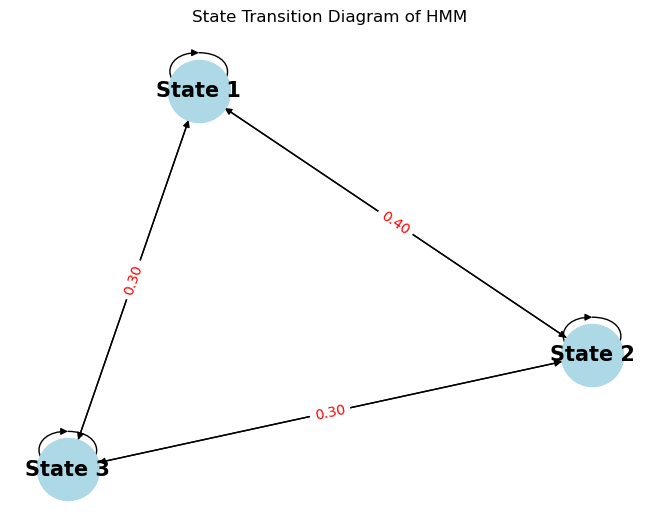

In [21]:
#p17
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the HMM parameters
states = ['State 1', 'State 2', 'State 3']
transition_matrix = [
    [0.7, 0.2, 0.1],
    [0.4, 0.5, 0.1],
    [0.3, 0.3, 0.4]
]

# Function to visualize the HMM state transitions
def visualize_hmm(states, transition_matrix):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes
    for state in states:
        G.add_node(state)
    
    # Add edges with weights based on the transition matrix
    for i, state_from in enumerate(states):
        for j, state_to in enumerate(states):
            weight = transition_matrix[i][j]
            if weight > 0:  # Only add edges with positive weights
                G.add_edge(state_from, state_to, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold', arrows=True)

    # Draw edge labels
    edge_labels = {(states[i], states[j]): f'{transition_matrix[i][j]:.2f}' 
                   for i in range(len(states)) for j in range(len(states)) if transition_matrix[i][j] > 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title('State Transition Diagram of HMM')
    plt.show()

# Run the visualization function
visualize_hmm(states, transition_matrix)



In [17]:
#P18
import numpy as np

def compute_likelihood(observations, start_prob, trans_prob, emit_prob):
    n_states = trans_prob.shape[0]
    n_observations = len(observations)

    # Forward Algorithm
    forward_matrix = np.zeros((n_states, n_observations))
    
    # Initialize base cases (t=0)
    for s in range(n_states):
        forward_matrix[s, 0] = start_prob[s] * emit_prob[s, observations[0]]
    
    # Forward pass
    for t in range(1, n_observations):
        for s in range(n_states):
            forward_matrix[s, t] = np.sum(forward_matrix[:, t-1] * trans_prob[:, s]) * emit_prob[s, observations[t]]
    
    # Likelihood from forward algorithm
    forward_likelihood = np.sum(forward_matrix[:, n_observations - 1])

    # Backward Algorithm
    backward_matrix = np.zeros((n_states, n_observations))
    
    # Initialize base cases (t=T)
    backward_matrix[:, n_observations - 1] = 1
    
    # Backward pass
    for t in range(n_observations - 2, -1, -1):
        for s in range(n_states):
            backward_matrix[s, t] = np.sum(backward_matrix[:, t + 1] * trans_prob[s, :] * emit_prob[:, observations[t + 1]])

    # Likelihood from backward algorithm
    backward_likelihood = np.sum(backward_matrix[:, 0] * emit_prob[:, observations[0]] * start_prob)

    return forward_likelihood, backward_likelihood

# Example parameters
start_prob = np.array([0.6, 0.4])  # Initial state probabilities
trans_prob = np.array([[0.7, 0.3],  # Transition probabilities
                       [0.4, 0.6]])
emit_prob = np.array([[0.5, 0.5],   # Emission probabilities
                      [0.1, 0.9]])

observations = [0, 1, 0]  # Observation sequence

# Compute likelihoods
forward_likelihood, backward_likelihood = compute_likelihood(observations, start_prob, trans_prob, emit_prob)

print(f"Forward Algorithm Likelihood: {forward_likelihood}")
print(f"Backward Algorithm Likelihood: {backward_likelihood}")


Forward Algorithm Likelihood: 0.06961600000000001
Backward Algorithm Likelihood: 0.069616


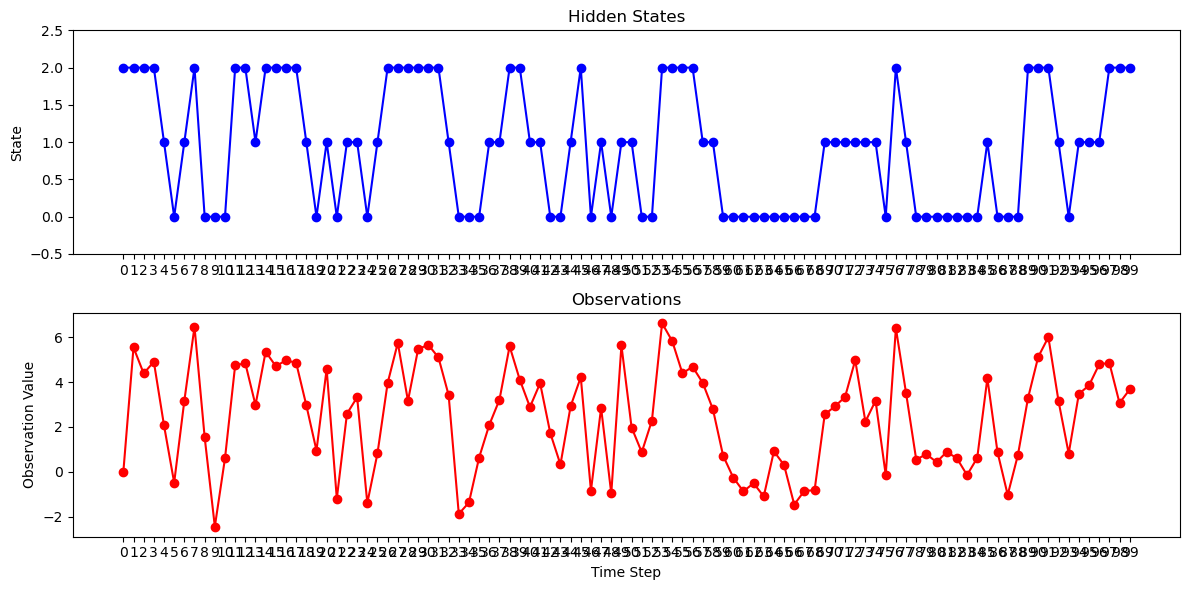

In [33]:
#p19import numpy as np
import matplotlib.pyplot as plt

# Parameters for the HMM
n_states = 3  # Number of hidden states
n_observations = 100  # Number of observations
np.random.seed(42)

# Transition probabilities between hidden states
transition_matrix = np.array([[0.7, 0.2, 0.1],
                               [0.3, 0.4, 0.3],
                               [0.1, 0.3, 0.6]])

# Emission probabilities (means and std deviations for Gaussian emissions)
means = np.array([0.0, 3.0, 5.0])  # Means of the Gaussians
stds = np.array([1.0, 1.0, 1.0])   # Standard deviations of the Gaussians

# Initialize arrays to store observations and hidden states
observations = np.zeros(n_observations)
hidden_states = np.zeros(n_observations, dtype=int)

# Initial state
hidden_states[0] = np.random.choice(n_states)

# Generate data
for t in range(1, n_observations):
    # Sample the hidden state
    hidden_states[t] = np.random.choice(n_states, p=transition_matrix[hidden_states[t-1]])
    # Generate observation based on the hidden state
    observations[t] = np.random.normal(means[hidden_states[t]], stds[hidden_states[t]])

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot hidden states
plt.subplot(2, 1, 1)
plt.plot(hidden_states, marker='o', linestyle='-', color='b')
plt.title('Hidden States')
plt.ylabel('State')
plt.ylim(-0.5, n_states - 0.5)
plt.xticks(range(n_observations))

# Plot observations
plt.subplot(2, 1, 2)
plt.plot(observations, marker='o', linestyle='-', color='r')
plt.title('Observations')
plt.ylabel('Observation Value')
plt.xlabel('Time Step')
plt.xticks(range(n_observations))

plt.tight_layout()
plt.show()


In [35]:
#p20
import numpy as np

def compute_stationary_distribution(transition_matrix):
    # Ensure the transition matrix is a NumPy array
    P = np.array(transition_matrix)
    
    # Number of states
    n_states = P.shape[0]
    
    # Create the augmented matrix for the system of equations
    A = np.vstack((P.T - np.eye(n_states), np.ones(n_states)))
    
    # Right-hand side vector
    b = np.zeros(n_states + 1)
    b[-1] = 1  # To ensure that the probabilities sum to 1
    
    # Solve the linear system
    stationary_distribution = np.linalg.lstsq(A, b, rcond=None)[0]
    
    return stationary_distribution

# Example usage
transition_matrix = [
    [0.7, 0.3],
    [0.4, 0.6]
]

stationary_dist = compute_stationary_distribution(transition_matrix)
print("Stationary Distribution:", stationary_dist)


Stationary Distribution: [0.57142857 0.42857143]
